#   Introduction
The gaming industry has reached a revenue stream of 138 billion dollars in 2021 and it's value keeps growing everyday. About 20 years ago, gaming was seen as hobby strictly for kids and now big companies finally realized it's potential and started investing hard on what is known to be one of the greatest entertainment industries of the 21ts century.
Amongst these companies, Valve is know for being one of the main players in the market not just due to the games they developed, but also because of their platform, Steam, which is the main gaming platform in the world with more 500,000 active players everyday.
Due to that I obtained from kaggle a dataset that contained data about users, the games they owned and the amount of hours played in those games. My main objective is to try to obtain any interesting insights based on the data, such as the most popular games, based on how many people have them and based on the amount of hours and also, see the amount of hours spent in those games.


##  Data Dictionary

|Columns|Column Names|Qualitative/Quantitative|Categorical/Disc/Cont|Data Type|Definition of variable|
|-----|-----|-----|-----|-----|-----|
|A|steam_id|Numerical|NA|Integer|Id of the user|
|B|game_name|Qualitative|Categorical|String|Name of the game|
|C|purchase_or_play|Qualitative|Categorical|String|If that entry is related to a purchase or the amount of hours played|
|D|hours_played|Quantitative|Continuous|Float|The amount of hours played and in case it is assigned to "purchase" column, the value will be 1, but it doesn't mean it has been played for an hour|
|E|release_date|Date|Date|Date|Date the game was released|
|F|developer|Qualitative|Categorical|String|Company that developed the game|
|G|publisher|Qualitative|Categorical|String|Company responsible by the game's distribution|
|H|platforms|Qualitative|Categorical|String|Which kind of computer the game can be played|
|I|genres|Qualitative|Categorical|String|Genre of the game|
|I|price|Quantitative|Continuous|Float|Game price|

##  Exploring the dataset

Importing basic libraries.

In [1]:
#   Importing basic libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importing the dataset and getting the types of data.

In [2]:
#   Importing the dataset

df_raw = pd.read_csv('data/steam_games.csv')

#   Getting the types of data

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200059 entries, 0 to 200058
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        200059 non-null  int64  
 1   steam_id          200059 non-null  int64  
 2   game_name         200059 non-null  object 
 3   purchase_or_play  200059 non-null  object 
 4   hours_played      200059 non-null  float64
 5   release_date      117871 non-null  object 
 6   developer         117871 non-null  object 
 7   publisher         117871 non-null  object 
 8   platforms         117871 non-null  object 
 9   genres            117871 non-null  object 
 10  price             117871 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 16.8+ MB


Checking the first entries.

In [3]:
#   Checking the first entries

df_raw.head()

,Unnamed: 0,steam_id,game_name,purchase_or_play,hours_played,release_date,developer,publisher,platforms,genres,price
0,0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,10/11/2011,Bethesda Game Studios,Bethesda Softworks,windows,RPG,9.99
1,1,151603712,The Elder Scrolls V Skyrim,play,273.0,10/11/2011,Bethesda Game Studios,Bethesda Softworks,windows,RPG,9.99
2,2,151603712,Fallout 4,purchase,1.0,09/11/2015,Bethesda Game Studios,Bethesda Softworks,windows,RPG,19.99
3,3,151603712,Fallout 4,play,87.0,09/11/2015,Bethesda Game Studios,Bethesda Softworks,windows,RPG,19.99
4,4,151603712,Spore,purchase,1.0,19/12/2008,Maxis,Electronic Arts,windows,Simulation,14.99


Dropping unnecessary columns.

In [4]:
#   Dropping unnecessary columns

df_raw = df_raw.drop(['release_date', 'platforms'], axis=1)

If the game was purchased, the dataset would show it as if it had been played for a hour.<br>
Now I want to change that and in the hours played for the games that are bought, we will put 0, because they haven't been played. 

In [5]:
df_raw['hours_played'] = np.where(df_raw['purchase_or_play']=='purchase', 0, df_raw['hours_played'])
df_raw.head()

,Unnamed: 0,steam_id,game_name,purchase_or_play,hours_played,developer,publisher,genres,price
0,0,151603712,The Elder Scrolls V Skyrim,purchase,0.0,Bethesda Game Studios,Bethesda Softworks,RPG,9.99
1,1,151603712,The Elder Scrolls V Skyrim,play,273.0,Bethesda Game Studios,Bethesda Softworks,RPG,9.99
2,2,151603712,Fallout 4,purchase,0.0,Bethesda Game Studios,Bethesda Softworks,RPG,19.99
3,3,151603712,Fallout 4,play,87.0,Bethesda Game Studios,Bethesda Softworks,RPG,19.99
4,4,151603712,Spore,purchase,0.0,Maxis,Electronic Arts,Simulation,14.99


The next step is, unify the 'purchase' and 'play' values because I don't want 2 rows for the same game.<br>
I want to have only the 'steam_id', 'game_name' and 'hours_played', but I can't just delete the 'purchase' rows, because some games are just owned and not played.<br>
I can separate the purchase and play entries in different datasets and then join the tables on steam_id and game_name.

Now I will create a dataframe only with the purchase data and since the hours played for the purchased games has been set to 0, I can drop this column.

In [6]:
df_purchase = df_raw.loc[df_raw['purchase_or_play']=='purchase']
df_purchase = df_purchase.drop(['hours_played'], axis=1)
df_purchase.head()

,Unnamed: 0,steam_id,game_name,purchase_or_play,developer,publisher,genres,price
0,0,151603712,The Elder Scrolls V Skyrim,purchase,Bethesda Game Studios,Bethesda Softworks,RPG,9.99
2,2,151603712,Fallout 4,purchase,Bethesda Game Studios,Bethesda Softworks,RPG,19.99
4,4,151603712,Spore,purchase,Maxis,Electronic Arts,Simulation,14.99
6,6,151603712,Fallout New Vegas,purchase,Obsidian Entertainment,Bethesda Softworks,Action;RPG,7.99
8,8,151603712,Left 4 Dead 2,purchase,Valve,Valve,Action,7.19


And here I will create a dataframe with the hours played.

In [7]:
#   Creating the dataframe with the hours played

df_play = df_raw.loc[df_raw['purchase_or_play']=='play']
df_play.head()

,Unnamed: 0,steam_id,game_name,purchase_or_play,hours_played,developer,publisher,genres,price
1,1,151603712,The Elder Scrolls V Skyrim,play,273.0,Bethesda Game Studios,Bethesda Softworks,RPG,9.99
3,3,151603712,Fallout 4,play,87.0,Bethesda Game Studios,Bethesda Softworks,RPG,19.99
5,5,151603712,Spore,play,14.9,Maxis,Electronic Arts,Simulation,14.99
7,7,151603712,Fallout New Vegas,play,12.1,Obsidian Entertainment,Bethesda Softworks,Action;RPG,7.99
9,9,151603712,Left 4 Dead 2,play,8.9,Valve,Valve,Action,7.19


Now, to create the definitive dataframe that I need, I will join both columns based on the 'steam_id' and the 'game_name' and then eliminate the 'purchase_or_play' columns.

In [8]:
#   Joining both columns based on the steam_id and the game_name

df_def = pd.merge(df_purchase, df_play, how='left', left_on=['steam_id', 'game_name'], right_on=['steam_id', 'game_name'])

#   Since we have united the purchase and play entries, we can eliminate those columns
df_def = df_def.drop(['purchase_or_play_x', 'purchase_or_play_y', 'Unnamed: 0_x', 'developer_y', 'publisher_y', 'Unnamed: 0_y', 'genres_y', 'price_y'], axis=1)

df_def.head()

,steam_id,game_name,developer_x,publisher_x,genres_x,price_x,hours_played
0,151603712,The Elder Scrolls V Skyrim,Bethesda Game Studios,Bethesda Softworks,RPG,9.99,273.0
1,151603712,Fallout 4,Bethesda Game Studios,Bethesda Softworks,RPG,19.99,87.0
2,151603712,Spore,Maxis,Electronic Arts,Simulation,14.99,14.9
3,151603712,Fallout New Vegas,Obsidian Entertainment,Bethesda Softworks,Action;RPG,7.99,12.1
4,151603712,Left 4 Dead 2,Valve,Valve,Action,7.19,8.9


Checking the amount of rows that we have, which is 129607.

In [9]:
df_def.shape

(129607, 7)

Since some games have never been played,  our dataset has NaNs and we need to replace them with 0, because it represents better the amount of hours we are working with.<br>
It is better to replace NaNs with 0 than with their mean, median or mode because otherwise, it would create a false idea that the game have been played, which is not true and we want to have the data as accurate as possible.

In [10]:
#   Filling NaNs

df_def['hours_played'] = df_def['hours_played'].fillna(0)

### Now we have the dataset ready to go!

In [11]:
#   Now we have the dataset ready to go!
df_def = df_def.rename(columns={'developer_x': 'developer', 'publisher_x': 'publisher', 'genres_x': 'genres', 'price_x': 'price'})
df_def.head()

,steam_id,game_name,developer,publisher,genres,price,hours_played
0,151603712,The Elder Scrolls V Skyrim,Bethesda Game Studios,Bethesda Softworks,RPG,9.99,273.0
1,151603712,Fallout 4,Bethesda Game Studios,Bethesda Softworks,RPG,19.99,87.0
2,151603712,Spore,Maxis,Electronic Arts,Simulation,14.99,14.9
3,151603712,Fallout New Vegas,Obsidian Entertainment,Bethesda Softworks,Action;RPG,7.99,12.1
4,151603712,Left 4 Dead 2,Valve,Valve,Action,7.19,8.9


## Useful Queries

### Game most played based in time

Here are some useful queries for our dataset, the one below allows us to see the games based on the amount of time played.<br>
To do that, we are grouping by the game name, adding the hours played and sorting based on the most played first.<br>
Using the method '.shape', we can see that there is a total of 5155 games in the dataset.

In [12]:
#   For that I will need to groupby game, adding the hours played

#   Here I am selecting the columns from 'game_name' till the end.
df_hours_played = df_def.iloc[:, 1:]

#   Grouping by the game name, adding the total of hours played and dropping the column price.
df_hours_played = df_hours_played.groupby(['game_name'], as_index=False).sum().sort_values(by='hours_played', ascending=False ).drop(['price'], axis=1)
df_hours_played.head()

,game_name,hours_played
1336,Dota 2,981684.6
981,Counter-Strike Global Offensive,322771.6
4257,Team Fortress 2,173673.3
978,Counter-Strike,134261.1
3825,Sid Meier's Civilization V,99821.3


In [13]:
df_hours_played.shape

(5155, 2)

### Game most played based in amount of people

Here we display the amount of people that has each game, and sorted it based on the game that most people have.<br>
Using the method '.shape', we see that there are 5155, which is the same amount of games shown on the previous query, which means that the amount of games is correct!

In [14]:
#   GET THE GAME THAT MOST PEOPLE HAVE

df_total_players = df_def.iloc[:, 0:-1]

df_total_players = df_total_players.groupby(['game_name'], as_index=False).count().sort_values(by='steam_id', ascending=False ).drop([
    'developer', 'publisher', 'genres', 'price'], axis=1)

df_total_players = df_total_players.rename(columns={'steam_id': 'total_players'})

df_total_players.head()

,game_name,total_players
1336,Dota 2,4841
4257,Team Fortress 2,2323
4788,Unturned,1563
981,Counter-Strike Global Offensive,1412
2074,Half-Life 2 Lost Coast,981


In [15]:

df_total_players.shape

(5155, 2)

### Dataset containing the total amount of players and hours per game

Uniting the 'total_players' and 'hours_played' datasets, this way we will know which games have been played by how many people and how many hours.

In [16]:
#   Uniting the 'total_players' and 'hours_played' datasets and sorting them firstly based on the amount of players and then based on the amount of hours played.

df_total = pd.merge(df_total_players, df_hours_played, how='left', left_on=['game_name'], right_on=['game_name']).sort_values(by=['total_players', 'hours_played'], ascending=False )
df_total.head()

,game_name,total_players,hours_played
0,Dota 2,4841,981684.6
1,Team Fortress 2,2323,173673.3
2,Unturned,1563,16096.4
3,Counter-Strike Global Offensive,1412,322771.6
4,Half-Life 2 Lost Coast,981,184.4


Based on the data above, now can see what are the most popular games and track what is the average playing time for those games.

### Game specific data

Here there is another query directed to searching data related to specific games, with it, you can find the players and the amount of hours each player spent in that game.

In [17]:
#   Create query to select the people based on the game
df_temp_game_players = df_def.loc[df_def['game_name'] == 'Team Fortress 2']    #   Just change 'Team Fortress 2' for the name of the game to be searched
df_temp_game_players.head()

,steam_id,game_name,developer,publisher,genres,price,hours_played
9,151603712,Team Fortress 2,Valve,Valve,Action;Free to Play,0.0,2.8
62,59945701,Team Fortress 2,Valve,Valve,Action;Free to Play,0.0,0.1
590,140954425,Team Fortress 2,Valve,Valve,Action;Free to Play,0.0,13.0
603,150128162,Team Fortress 2,Valve,Valve,Action;Free to Play,0.0,42.0
607,297811211,Team Fortress 2,Valve,Valve,Action;Free to Play,0.0,10.1


In [18]:

df_temp_game_players['steam_id'].count()    #   To get the total of players of that game

2323

In [19]:

df_temp_game_players['hours_played'].sum()    #   To get the total of hours that game has been played

173673.30000000002

### Most popular genres

Here we will separate the dataset based on the genres and get the amount of players and games each one has.
Also, we will create another dataset with the most popular genres for an important consult we will do later.

In [20]:
#   Get the most popular genres

df_genres = df_def.iloc[:, 0:-1]

df_genres = df_genres.groupby(['genres'], as_index=False).count().sort_values(by='steam_id', ascending=False ).drop([
    'developer', 'publisher', 'price'], axis=1)

df_genres = df_genres.rename(columns={'steam_id': 'total_players', 'game_name': 'total_games'})

top_genres = df_genres['genres'].head(50)
top_genres.head()

0                            Action
72              Action;Free to Play
93     Action;Free to Play;Strategy
1                  Action;Adventure
272                             RPG
Name: genres, dtype: object

###   Question 5

   Pick two different types<br>

   The first variable I choose is 'hours_played' which is a quantitative and continuous variable<br>

   A. Get the central tendency measures:<br>
    - Mean = 669.687352 <br>
    - Median = 3.9<br>
    - Mode = 0.2<br>

On the code below, you will find how I manage to retrieve those values.

In [21]:
# Getting the mean

df_total.describe() 

,total_players,hours_played
count,5155.000000,5155.000000
mean,25.141998,669.703996
std,101.583419,14990.387764
min,1.000000,0.000000
25%,2.000000,0.000000
50%,5.000000,3.900000
75%,18.000000,37.900000
max,4841.000000,981684.600000


In [22]:
# Getting the median amount of hours

df_total.median() 

total_players    5.0
hours_played     3.9
dtype: float64

Here we can see that I do not delete the games that have never been played, the mode for 'total_players' and 'hours_played' is 1 and 0 respectively, this happens due to the fact that if we take a look in our database, <br>
We can see that there are many games that owned by only one person and that many games never have been played.<br>
Obs: This is a known fact in the gaming community and many people joke about the fact that they have games that they never played

So, I decided to drop the games that have never been played. And the mode is 0.2 for the hours played.

But, to get the real number, I will keep that line of code commented, just a nice feature that if needed, we can remove the comment and see the change in the outcome

In [23]:
df_temp = df_total.iloc[:,1:] # If I get the mode from 'df_total', all game names whill be shown, so I will get only the numeric columns

#   On the line below, I removed all the games that have never been played, so we can have a different outcome. 
#   I will keep that line commented but if you remove the comment and execute the code again, you will see the difference in the mode. 

# df_temp = df_temp.drop(df_temp[df_temp.hours_played == 0].index) 

df_temp.mode() #   Getting the mode from total of hours played, here we can see that most players play a game for 0 hours

,total_players,hours_played
0,1,0.0


   B. Get the measures of dispersion:<br>
         - Range = 981684.49<br>
         - Interquartile Range = 95.15<br>
         - Variance =  3.21<br>
         - Standard Deviation = 14990.38 -> Got this from the 'describe()' method, when we got the mean<br>

On the code below, you will find how I manage to retrieve those values.

In [24]:
#   Getting the range
range = df_total['hours_played'].max() - df_total['hours_played'].min()
range

981684.5999999989

In [25]:
#   Getting the Interquartile Range
Q1 = df_total['hours_played'].quantile(0.25)
Q3 = df_total['hours_played'].quantile(0.75)
IQR = Q3 - Q1
IQR

37.900000000000006

In [26]:
#   Getting the variance
df_total.var()

total_players    1.031919e+04
hours_played     2.247117e+08
dtype: float64

   C. Get the 5 number summary:<br>
         - min(x) = 0<br>
         - Q1 = 0<br>
         - median =  3.9<br>
         - Q3 = 37.9<br>
         - max(x) = 981684.6<br>

On the code below, you will find how I manage to retrieve those values.

In [27]:
#   The method 'describe()' gives us the 5 number summary
df_total.describe()

,total_players,hours_played
count,5155.000000,5155.000000
mean,25.141998,669.703996
std,101.583419,14990.387764
min,1.000000,0.000000
25%,2.000000,0.000000
50%,5.000000,3.900000
75%,18.000000,37.900000
max,4841.000000,981684.600000


Since the instructions said that we needed to pick 2 different variables, I got a bit unsure about picking the qualitative variable, since we would be able to get only the mode of it and none of the other values requested such as mean, median, mode, quartiles and such.

So, about the second variable, I decided to do 2 different things with 2 different variables.

The first thing that I did, was to work with the variable 'genres', which is a qualitative categorical variable. As said previously, since it is not a numerical variable, we can only get the mode, which means, we will get the genre most mentioned, which also mean, most common.

So, now using the list with the 50 most common genres previously created, we will eliminate the data from all the games that do not belong to the most popular genres.
And by using the '.mode()', we will get which genre is the most popular among the games, which is "Action".

In [28]:
#   Getting the mode of the genre
df_genres = df_def[df_def['genres'].isin(top_genres)]
df_genres['genres'].mode()

0    Action
dtype: object

Then, the second thing I decided to do was to choose the variable 'steam_id', which is a numerical identifier, but through the use of feature engineering, I managed to get the amount of players per game and create variable 'total_players'. This way I was able to get all the statistical information required, just like it was done with the first variable 'hours_played'.

To get meaningful information, I decided to get only the data related to the 50 games with most players.

In [29]:
#   Getting the games based on which one has more players

df_temp_2 = df_total.sort_values(by='total_players', ascending=False).iloc[:51]
df_temp_2.head()

,game_name,total_players,hours_played
0,Dota 2,4841,981684.6
1,Team Fortress 2,2323,173673.3
2,Unturned,1563,16096.4
3,Counter-Strike Global Offensive,1412,322771.6
4,Half-Life 2 Lost Coast,981,184.4


   A.Get the central tendency measures:<br>
         - Mean =  675.03<br>
         - Median = 438.0<br>
         - Mode = 343, 365, 366, 524, 679<br>

On the code below, you will find how I manage to retrieve those values.

In [30]:
#   Getting the mean

df_temp_2.describe()

,total_players,hours_played
count,51.000000,51.000000
mean,675.039216,43945.870588
std,697.232442,144979.324391
min,323.000000,0.000000
25%,365.500000,982.000000
50%,438.000000,4260.300000
75%,684.000000,21140.850000
max,4841.000000,981684.600000


In [31]:
#   Getting the median

df_temp_2.median()

total_players     438.0
hours_played     4260.3
dtype: float64

In [32]:
#   Getting the modes
df_temp_2['total_players'].mode()

0    343
1    365
2    366
3    524
4    679
dtype: int64

   B.Get the measures of dispersion:<br>
         - Range = 4518<br>
         - Interquartile Range = 318.5<br>
         - Variance =  4.86<br>
         - Standard Deviation = 697.23<br>

In [33]:
#   Getting the range
range = df_temp_2['total_players'].max() - df_temp_2['total_players'].min()
range

4518

In [34]:
#   Getting the Interquartile Range
Q1_var2 = df_temp_2['total_players'].quantile(0.25)
Q3_var2 = df_temp_2['total_players'].quantile(0.75)
IQR_var2 = Q3_var2 - Q1_var2
IQR_var2

318.5

In [35]:
#   Getting the variance
df_temp_2.var()

total_players    4.861331e+05
hours_played     2.101900e+10
dtype: float64

In [36]:
#   Getting the standard deviation
df_temp_2.describe()

,total_players,hours_played
count,51.000000,51.000000
mean,675.039216,43945.870588
std,697.232442,144979.324391
min,323.000000,0.000000
25%,365.500000,982.000000
50%,438.000000,4260.300000
75%,684.000000,21140.850000
max,4841.000000,981684.600000


   C. Get the 5 number summary:<br>
         - min(x) = 323<br>
         - Q1 = 365.50<br>
         - median = 438<br>
         - Q3 = 684<br>
         - max(x) = 4841<br>

In [37]:
#   The 'describe()' method gives us the 5 number summary
df_temp_2.describe()

,total_players,hours_played
count,51.000000,51.000000
mean,675.039216,43945.870588
std,697.232442,144979.324391
min,323.000000,0.000000
25%,365.500000,982.000000
50%,438.000000,4260.300000
75%,684.000000,21140.850000
max,4841.000000,981684.600000


### Question 6
Using appropriate graphics, plot the 2 variables picked in 6 to get a better idea of its dispersion.

<AxesSubplot:xlabel='total_players'>

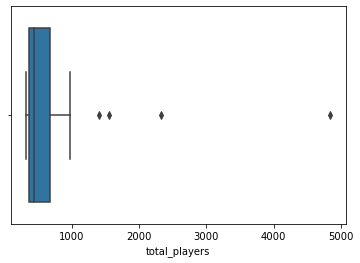

In [38]:
sns.boxplot(x=df_temp_2['total_players'])

<AxesSubplot:>

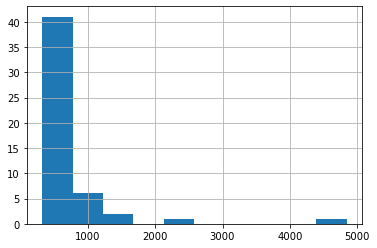

In [39]:
df_temp_2['total_players'].hist()

The graphic above is a boxplot of the regular amount of players per game. We can see that there are a few outliers with more than a thousand players, but most games do not have such a huge player base.

<AxesSubplot:>

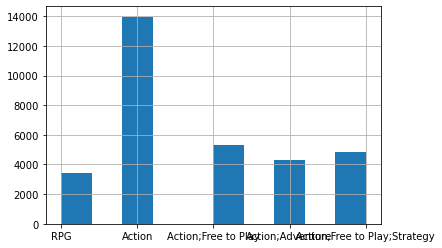

In [40]:
top5_genres = top_genres.head(5)

df_5genres = df_def[df_def['genres'].isin(top5_genres)]

df_5genres['genres'].hist()

The histogram above contains the top 5 most common games based on players. Here we can see that "Action" has around 14000 players. In second place we can see "Action;Free to Play".

<AxesSubplot:xlabel='hours_played'>

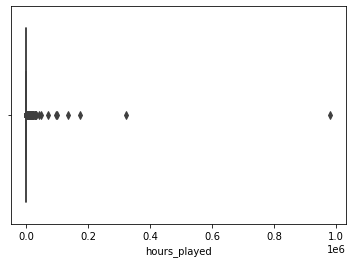

In [41]:
sns.boxplot(x=df_temp['hours_played'])

<AxesSubplot:>

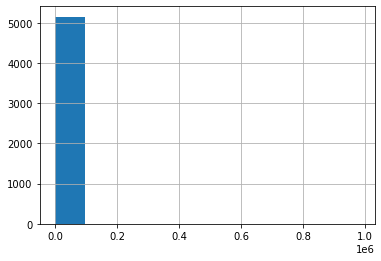

In [42]:
df_temp['hours_played'].hist()

In the boxplot above based on the amount of hours, we can also see that even though some games are played extensively, most games in steam are not even played.

To facilitate the understanding of the graphs below, I just used the 50 first rows to illustrate the games with the biggest amount of players and hours.

Text(0.5, 0, 'Games')

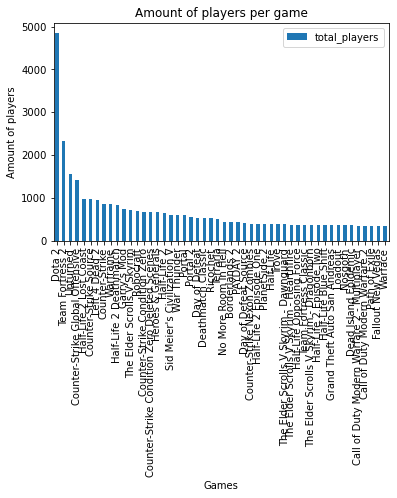

In [43]:
#   To facilitate the creation of the graphs, I just use the 50 first rows to illustrate the games with the biggest amount of players and hours

df_graphs = df_total.sort_values(by='total_players', ascending=False).iloc[:50]
df_graphs_2 = df_total.sort_values(by='hours_played', ascending=False).iloc[:50]

df_graphs.plot(kind='bar', x='game_name', y='total_players')

plt.title("Amount of players per game")
plt.ylabel("Amount of players")
plt.xlabel("Games")

Text(0.5, 0, 'Hours')

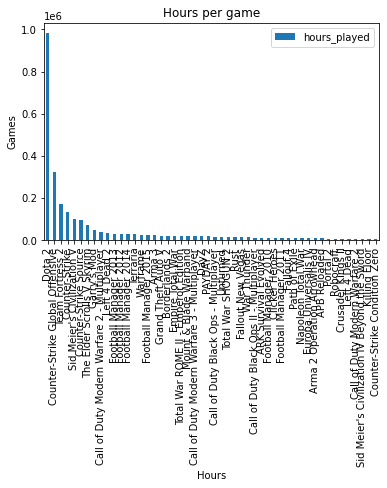

In [44]:
df_graphs_2.plot(kind='bar', x='game_name', y='hours_played')

plt.title("Hours per game")
plt.ylabel("Games")
plt.xlabel("Hours")

### Question 7
Do the variables picked in 6, follow a symmetric distribution?<br>

A: No, they don't. I could have removed the games that have the big amounts of players and time, but unlike the games that have not enough hours and are not important, those games are important to hour analysis, since they represent the biggest commercial success.

About their distribution, for the variables “total_players” and “hours_played”, by executing the commands
“.skew()” and “.kurt()”, we can see that their skewedness is 25.83 and 56.91 respectivaly, which means that 
since they are above 0, they are right-skewed and that makes total sense when we see the boxplots and 
histograms shown on the question 6, and their kurtosis 1057.46 and 3606.89 respectivaly, which is higher 
than 3, meaning that we have a leptokurtic distribution in both variables.

In [45]:
df_total.skew()

total_players    25.831113
hours_played     56.917490
dtype: float64

In [46]:
df_total.kurt()

total_players    1057.466380
hours_played     3606.893718
dtype: float64

### Question 8

Do the variables picked in 6 have any missing values? Do they have any outliers? Justify your answer.

A The dataset that I got had duplicated and wrong data, where if a game was purchased, he would have 1 
entry stating that he was played for half and hour and if it was played, there would be another entry for the 
amount of hours played and also, many games did not have information such as “developer”, ”publisher”
and etc.<br>
I had to remodel the dataset to avoid those duplicated entries and create a single entry for every game that 
the player owned and put the right amount of played hours. In case he just owned the game, there would 
be 0 hours.<br>
This later showed that many games were just bought and never played, with many zeros which in one hand 
can be considered outliers or since they are the most expressive number, they might be considered part of 
the important data. On the other hand, 'Dota 2' showed a huge player base and amount of hours and even 
though it might be considered an outlier as well, it seems as a representation of its importance in the 
gaming industry which cannot be ignored. Even though some entries did not have information such as 
developer and platform, we had all the variables we needed and just needed to clean them and we have 
outliers, but they cannot be ignored because they also show us important data and meaningful insight 
about the gaming industry

#   Conclusion

This assignment was a really nice way to exercise my python skills with a subject that I am attracted to.<br>
The outcome was something that even though I already knew, I was not expecting, which is the fact that 
'Dota 2' is one of the most important and popular games and with it, as mentioned during the assignment, 
the fact that many of steam users have games that they never played. <br>
As said previously, this is a known fact, but I never imagined that it was such an expressive number, since as 
shown before, when we gathered the mode of 'hours_played' with games that never have been played we 
got only the number 0, which means that most games have never been played. This is an interesting fact 
and might provide some interesting insight about how Valve sees the usage of its platform.